Import required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.svm import SVC
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, GaussianNoise
from tensorflow.keras.utils import to_categorical

Load MNIST dataset (Handwritten digit images)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Normalize pixel values to [0,1] for both methods

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Flatten images for SVM (28x28 -> 784)

In [ ]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

Convert labels to categorical for SVM

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

1️⃣ MACHINE LEARNING APPROACH: SUPPORT VECTOR MACHINE (SVM)

    Definition:
    Support Vector Machine (SVM) is a supervised machine learning model that finds an optimal hyperplane
    to separate different classes. It uses a kernel trick to transform data into higher dimensions.

    Formula for decision function:
    f(x) = w·x + b
        where:
        - w = weight vector
        - x = input feature vector
        - b = bias term

Train SVM on the flattened images

In [ ]:
print("Training SVM model...")
svm_model = SVC(kernel='linear', C=1.0)  # Linear kernel for simplicity
svm_model.fit(x_train_flat[:10000], y_train[:10000])  # Train on a subset (10,000 samples)

Training SVM model...


SVC(kernel='linear')

Predict using SVM

In [ ]:
svm_preds = svm_model.predict(x_test_flat)
# Compute accuracy
svm_accuracy = np.mean(svm_preds == y_test)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

SVM Accuracy: 91.70%


2️⃣ DEEP LEARNING APPROACH: AUTOENCODER

    Definition:
    An autoencoder is an unsupervised deep learning model used for feature extraction and dimensionality reduction.
    It consists of:
      - An **Encoder**: Compresses input into a lower-dimensional latent representation.
      - A **Decoder**: Reconstructs the original input from the latent representation.

    Formula (Reconstruction Loss):
    L = ||X - X'||^2
        where:
        - X = original input
        - X' = reconstructed output
        - ||.||^2 = Mean Squared Error (MSE)

Define Autoencoder architecture

In [ ]:
input_layer = Input(shape=(28, 28, 1))

# Encoder: Reduce dimensionality
encoded = Flatten()(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder: Reconstruct the input
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(28*28, activation='sigmoid')(decoded)  # Sigmoid activation to reconstruct image
decoded = Reshape((28, 28, 1))(decoded)

# Build autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

Train autoencoder

In [ ]:
print("Training Autoencoder...")
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Training Autoencoder...
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0930 - val_loss: 0.0375
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0340 - val_loss: 0.0262
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0252 - val_loss: 0.0218
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0214 - val_loss: 0.0192
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0191 - val_loss: 0.0174
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0175 - val_loss: 0.0162
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0162 - val_loss: 0.0151
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0153 - val_loss: 0.0144
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0145 - val_loss: 0.0135
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0138 - val_loss: 0.0131


Extract encoder part for feature representation

In [ ]:
encoder = Model(input_layer, encoded)

# Extract features from test images
x_test_encoded = encoder.predict(x_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Train SVM using deep features from Autoencoder

In [ ]:
print("Training SVM on encoded deep features...")
svm_model_deep = SVC(kernel='linear', C=1.0)
svm_model_deep.fit(x_test_encoded[:10000], y_test[:10000])  # Train on deep features

Training SVM on encoded deep features...


SVC(kernel='linear')

Predict using SVM on deep features

In [ ]:
x_test_encoded_test = encoder.predict(x_test)
svm_preds_deep = svm_model_deep.predict(x_test_encoded_test)

# Compute accuracy
svm_accuracy_deep = np.mean(svm_preds_deep == y_test)
print(f"SVM on Autoencoder Features Accuracy: {svm_accuracy_deep * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
SVM on Autoencoder Features Accuracy: 93.31%


3️⃣ VISUALIZATION: DIFFERENCES BETWEEN SVM AND AUTOENCODER

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


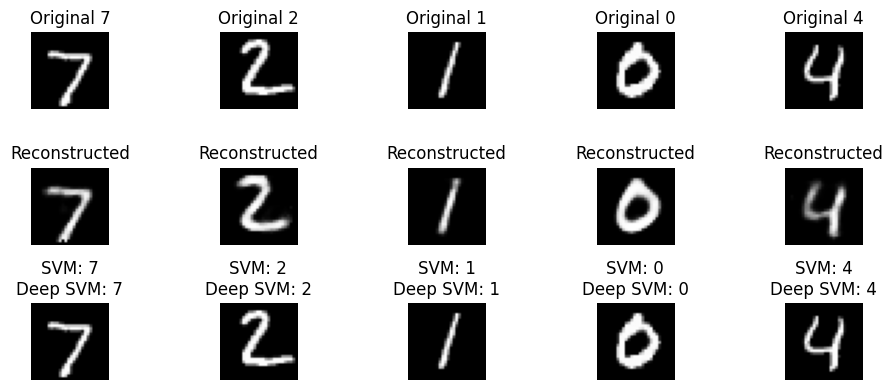

In [ ]:
# Select some test images
n = 5
plt.figure(figsize=(10, 4))

# Original Images
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Original {y_test[i]}")
    plt.axis('off')

# Reconstructed Images (Autoencoder)
decoded_imgs = autoencoder.predict(x_test[:n])
for i in range(n):
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

# SVM Predictions
for i in range(n):
    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"SVM: {svm_preds[i]}\nDeep SVM: {svm_preds_deep[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Conclusion:

    - SVM on raw pixels has lower accuracy because it does not extract hierarchical features.
    - Autoencoder learns meaningful representations and improves classification accuracy when used with SVM.